In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()

In [2]:
#Loading the dataset of month of April and year 2014
uber_april_2014 = pd.read_csv('D:\\Data scientist\\Course\\Kaggle\\uber-raw-data-apr14.csv')

In [3]:
#Glimpse of the data 
uber_april_2014.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
#Checking for any missing value 
uber_april_2014.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [5]:
#More info about data
uber_april_2014.info()
uber_april_2014.shape
#After going through the data it's seem that the Date/Time column has string value
#Total 564516 observation 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
Date/Time    564516 non-null object
Lat          564516 non-null float64
Lon          564516 non-null float64
Base         564516 non-null object
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


(564516, 4)

In [6]:
#Converting string to datetime format
uber_april_2014['Date/Time']=uber_april_2014['Date/Time'].apply(lambda x : datetime.strptime(x,'%m/%d/%Y %H:%M:%S'))
uber_april_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
Date/Time    564516 non-null datetime64[ns]
Lat          564516 non-null float64
Lon          564516 non-null float64
Base         564516 non-null object
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.2+ MB


In [7]:
#After converting to date format, time specific column should be made but before that..
#checking for info in seconds and it's seem that all values are 0 so seconds column is not required
uber_april_2014['Date/Time'].apply(lambda x : x.second)

0         0
1         0
2         0
3         0
4         0
         ..
564511    0
564512    0
564513    0
564514    0
564515    0
Name: Date/Time, Length: 564516, dtype: int64

In [8]:
#columns contaning time specific info except second column
uber_april_2014['Year']=uber_april_2014['Date/Time'].apply(lambda x : x.year)
uber_april_2014['Month']=uber_april_2014['Date/Time'].apply(lambda x : x.month)

d={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thusday',4:'Friday',5:'Saturday',6:'Sunday'}
uber_april_2014['Day_of_week']=uber_april_2014['Date/Time'].apply(lambda x : x.weekday())
uber_april_2014['Day_of_week']=uber_april_2014['Day_of_week'].map(d)

uber_april_2014['Hour']=uber_april_2014['Date/Time'].apply(lambda x : x.hour)
uber_april_2014['Minute']=uber_april_2014['Date/Time'].apply(lambda x : x.minute)

In [9]:
uber_april_2014['Base'].value_counts()

B02682    227808
B02598    183263
B02617    108001
B02512     35536
B02764      9908
Name: Base, dtype: int64

In [10]:
#uber bases
d=dict(B02682='Schmecken',B02598='Hinter',B02617='Weiter',B02512='Unter',B02764='Danach_NY')
uber_april_2014['Base']=uber_april_2014['Base'].map(d)
uber_april_2014.head()

,Date/Time,Lat,Lon,Base,Year,Month,Day_of_week,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,Unter,2014,4,Tuesday,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,Unter,2014,4,Tuesday,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,Unter,2014,4,Tuesday,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,Unter,2014,4,Tuesday,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,Unter,2014,4,Tuesday,0,33


In [11]:
#Rearranging the column
uber_april_2014.columns.values
uber_april_2014=uber_april_2014[['Base', 'Year', 'Month', 'Day_of_week', 'Hour','Minute','Lat','Lon']]

In [12]:
#checking if everything went accordingly 
uber_april_2014.nunique()
#Everything is well fine, the only last thing left is to check base column

Base              5
Year              1
Month             1
Day_of_week       7
Hour             24
Minute           60
Lat            4149
Lon            5621
dtype: int64

In [13]:
uber_april_2014.describe()
#observing the lat and lon column, the area of interest in very narrow 

,Year,Month,Hour,Minute,Lat,Lon
count,564516.0,564516.0,564516.000000,564516.000000,564516.000000,564516.000000
mean,2014.0,4.0,14.465043,29.456334,40.740005,-73.976817
std,0.0,0.0,5.873925,17.305504,0.036083,0.050426
min,2014.0,4.0,0.000000,0.000000,40.072900,-74.773300
25%,2014.0,4.0,10.000000,14.000000,40.722500,-73.997700
50%,2014.0,4.0,16.000000,29.000000,40.742500,-73.984800
75%,2014.0,4.0,19.000000,44.000000,40.760700,-73.970000
max,2014.0,4.0,23.000000,59.000000,42.116600,-72.066600


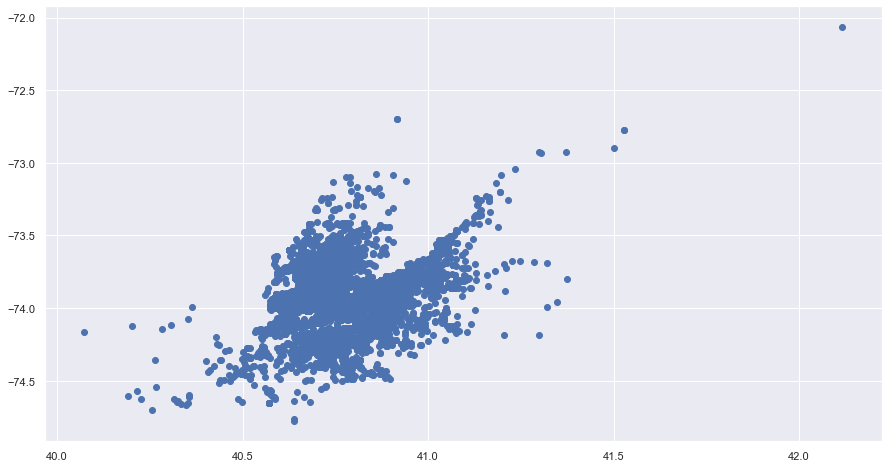

In [14]:
#scatter ploting between lat and log
plt.figure(figsize=(15,8))
plt.scatter(uber_april_2014['Lat'],uber_april_2014['Lon'])

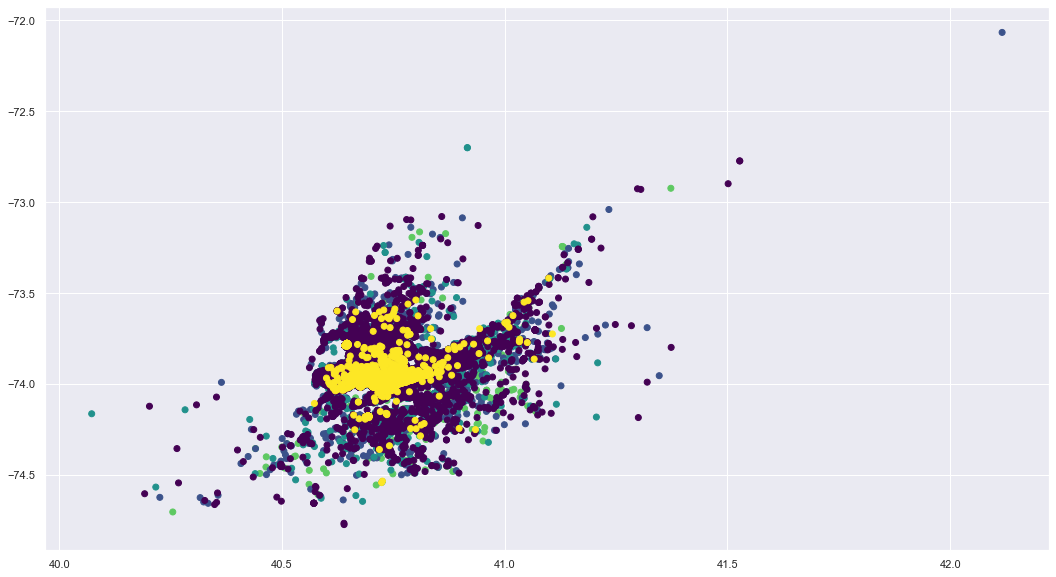

In [15]:
#to cluster the graph based on Base 
d=dict(Schmecken='0',Hinter='1',Weiter='2',Unter='3',Danach_NY='4')
uber_april_2014['BaseC']=uber_april_2014['Base'].map(d)
plt.figure(figsize=(18,10))
plt.scatter(uber_april_2014['Lat'],uber_april_2014['Lon'],c=uber_april_2014['BaseC'].astype(int),cmap='viridis')
uber_april_2014.drop('BaseC',axis=1,inplace=True)

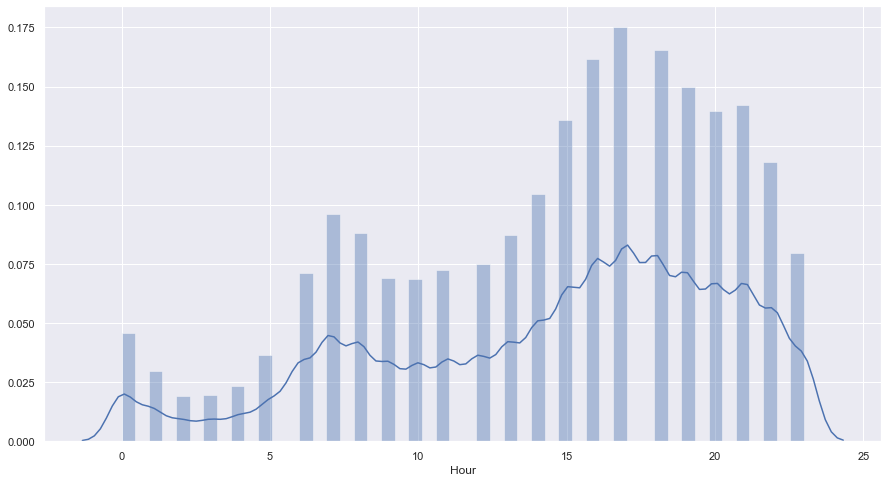

In [16]:
#uber pickup frequency based on Hours of the day
plt.figure(figsize=(15,8))
sns.distplot(uber_april_2014['Hour'])
#uber is mostly busy around 3pm to 9pm and slightly busy in the morning around 6am to 10am

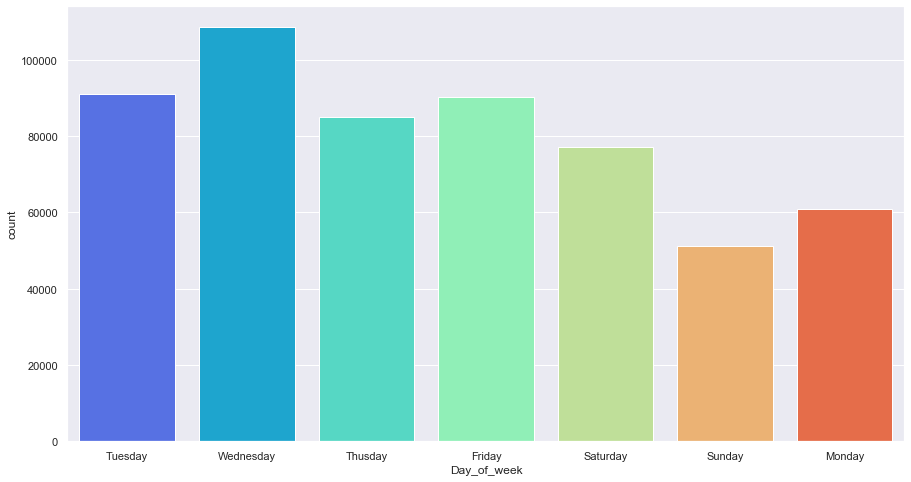

In [66]:
#uber pickup frequency based on days of the week
plt.figure(figsize=(15,8))
sns.countplot(uber_april_2014['Day_of_week'],palette='rainbow')
#people are choosing less uber on sunday and monday

# Let's check if the above trend is same for each base


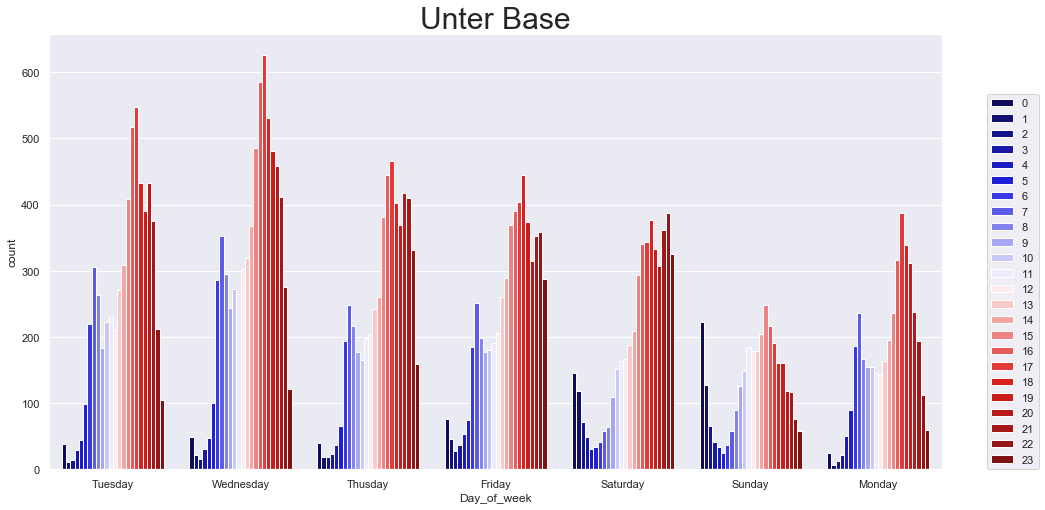

In [56]:
# Insight: Unter Base traffic monitoring on the bases of Day_of_week and Hours 
plt.figure(figsize=(16,8))
sns.countplot(uber_april_2014[uber_april_2014['Base']=='Unter']['Day_of_week'],
              hue=uber_april_2014[uber_april_2014['Base']=='Unter']['Hour'],palette='seismic')
plt.title('Unter Base',size=30)
plt.legend(loc=(1.05,0))
plt.show()
#it's seem that uber has more pickup on Tuesday wednesday and thusday 
#people are opting for uber more in the evening(5pm to 9pm) period than the morning(6am to 9am) and the patter is same throughout the week

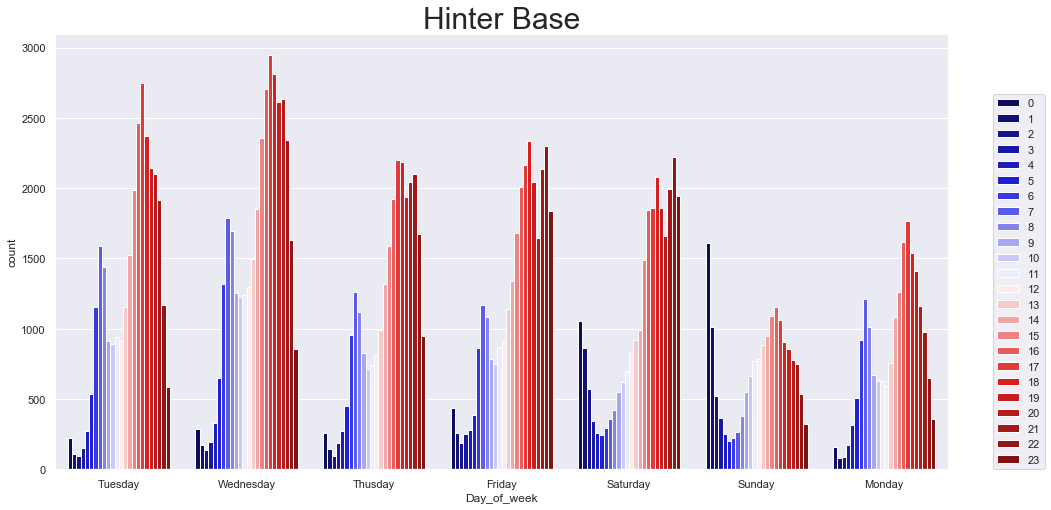

In [51]:
# Insight: Hinter Base traffic monitoring on the bases of Day_of_week and Hours 
plt.figure(figsize=(16,8))
sns.countplot(uber_april_2014[uber_april_2014['Base']=='Hinter']['Day_of_week'],
              hue=uber_april_2014[uber_april_2014['Base']=='Hinter']['Hour'],palette='seismic')
plt.title('Hinter Base',size=30)
plt.legend(loc=(1.05,0))
plt.show()
#it's seem that uber has less pickup on sunday and monday 
#the trend of pickup hour is as similar as observed in Unter traffic analysis

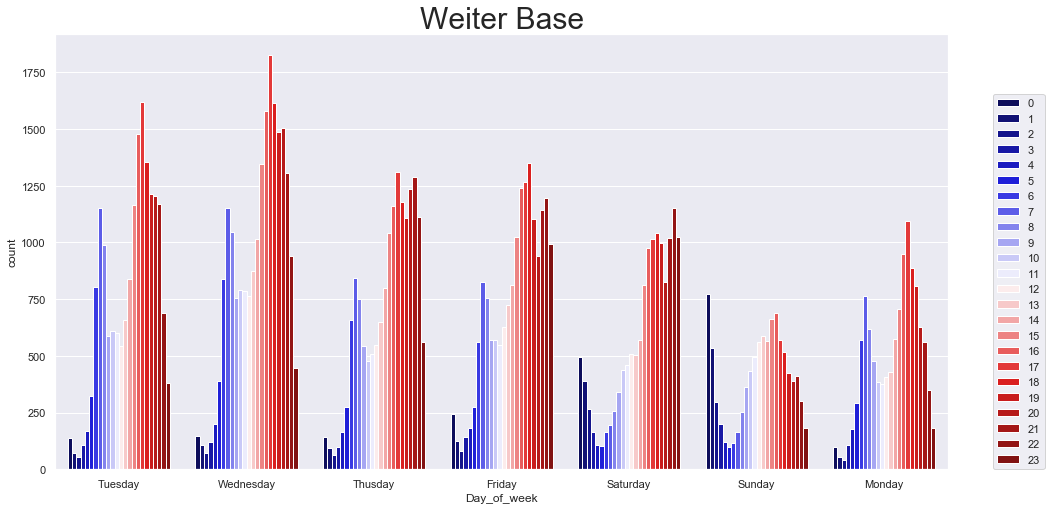

In [52]:
# Insight: Weiter Base traffic monitoring on the bases of Day_of_week and Hours 
plt.figure(figsize=(16,8))
sns.countplot(uber_april_2014[uber_april_2014['Base']=='Weiter']['Day_of_week'],
              hue=uber_april_2014[uber_april_2014['Base']=='Weiter']['Hour'],palette='seismic')
plt.title('Weiter Base',size=30)
plt.legend(loc=(1.05,0))
plt.show()
# here the traffic is less on saturday sunday and monday
# the trend is same no exception

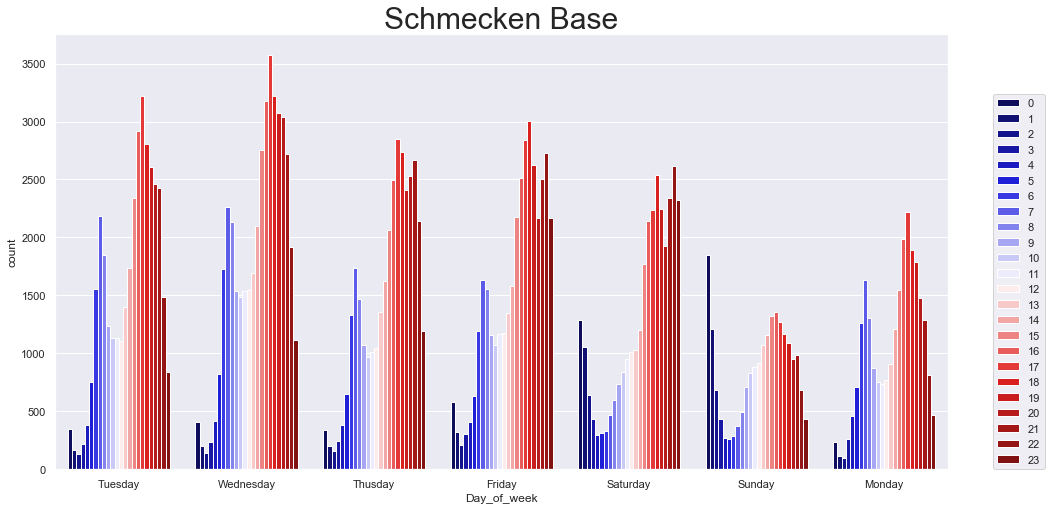

In [53]:
# Insight: Schmecken Base traffic monitoring on the bases of Day_of_week and Hours 
plt.figure(figsize=(16,8))
sns.countplot(uber_april_2014[uber_april_2014['Base']=='Schmecken']['Day_of_week'],
              hue=uber_april_2014[uber_april_2014['Base']=='Schmecken']['Hour'],palette='seismic')
plt.title('Schmecken Base',size=30)
plt.legend(loc=(1.05,0))
plt.show()
# here the traffic is less on sunday and monday
# the trend is same no exception

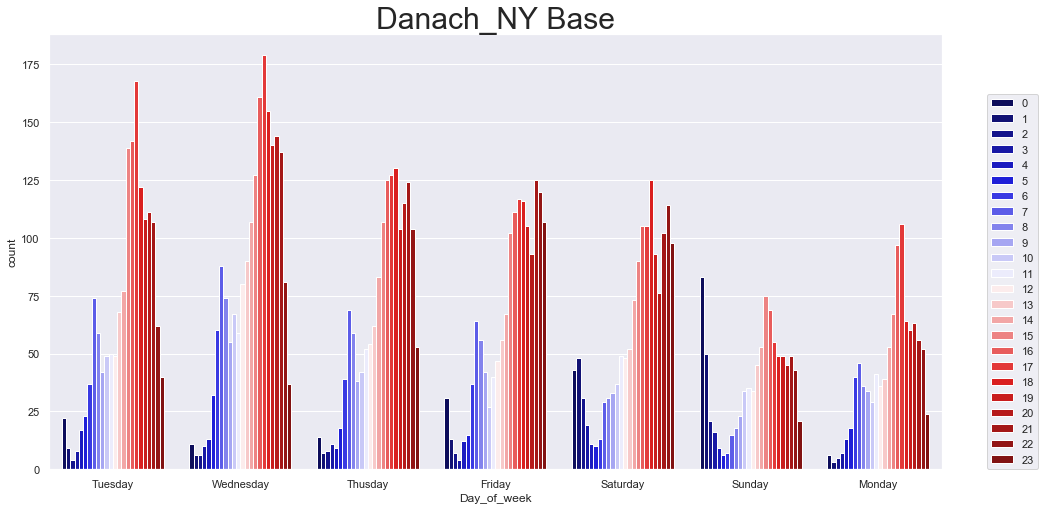

In [57]:
# Insight: Danach_NY Base traffic monitoring on the bases of Day_of_week and Hours 
plt.figure(figsize=(16,8))
sns.countplot(uber_april_2014[uber_april_2014['Base']=='Danach_NY']['Day_of_week'],
              hue=uber_april_2014[uber_april_2014['Base']=='Danach_NY']['Hour'],palette='seismic')
plt.title('Danach_NY Base',size=30)
plt.legend(loc=(1.05,0))
plt.show()
# here the traffic is less on sunday and monday
# the trend is same no exception

# The trend is same, let's check the number of pickups in each base

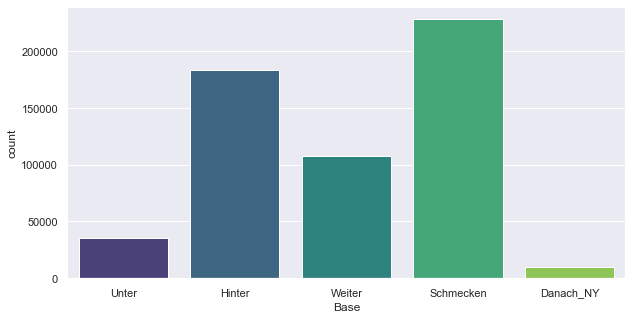

In [61]:
# comparing between base
plt.figure(figsize=(10,5))
sns.countplot(uber_april_2014['Base'],palette='viridis')
# Schmecken,Weiter and Hinter base have more pickups as compared to Unter and Danach_NY base